# Учимся работе с данными - от загрузки до моделирования

**Часть 1. EDA**

In [1]:
import kagglehub, os

# Download latest version
os.environ['KAGGLEHUB_CACHE'] = os.getcwd()
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

/Users/bot/Desktop/Study/ML/skl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/bot/Desktop/Study/ML/month_5_inML/lesson_7_Classification/ML_Base/hw9/datasets/uciml/breast-cancer-wisconsin-data/versions/2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("./data.csv")

In [4]:
# Посмотрите на базовые статистики датасета: средние, медианы и т.д.
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

'\nDiagnosis (M = malignant, B = benign)\n'

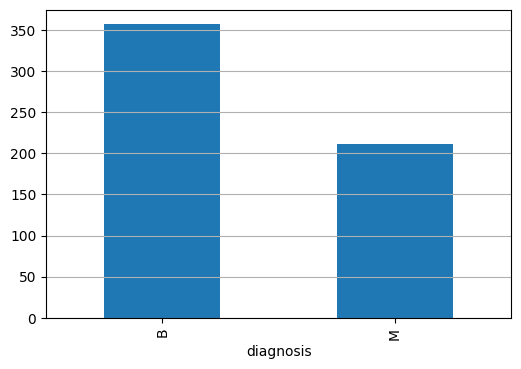

In [7]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')
"""
Diagnosis (M = malignant, B = benign)
"""

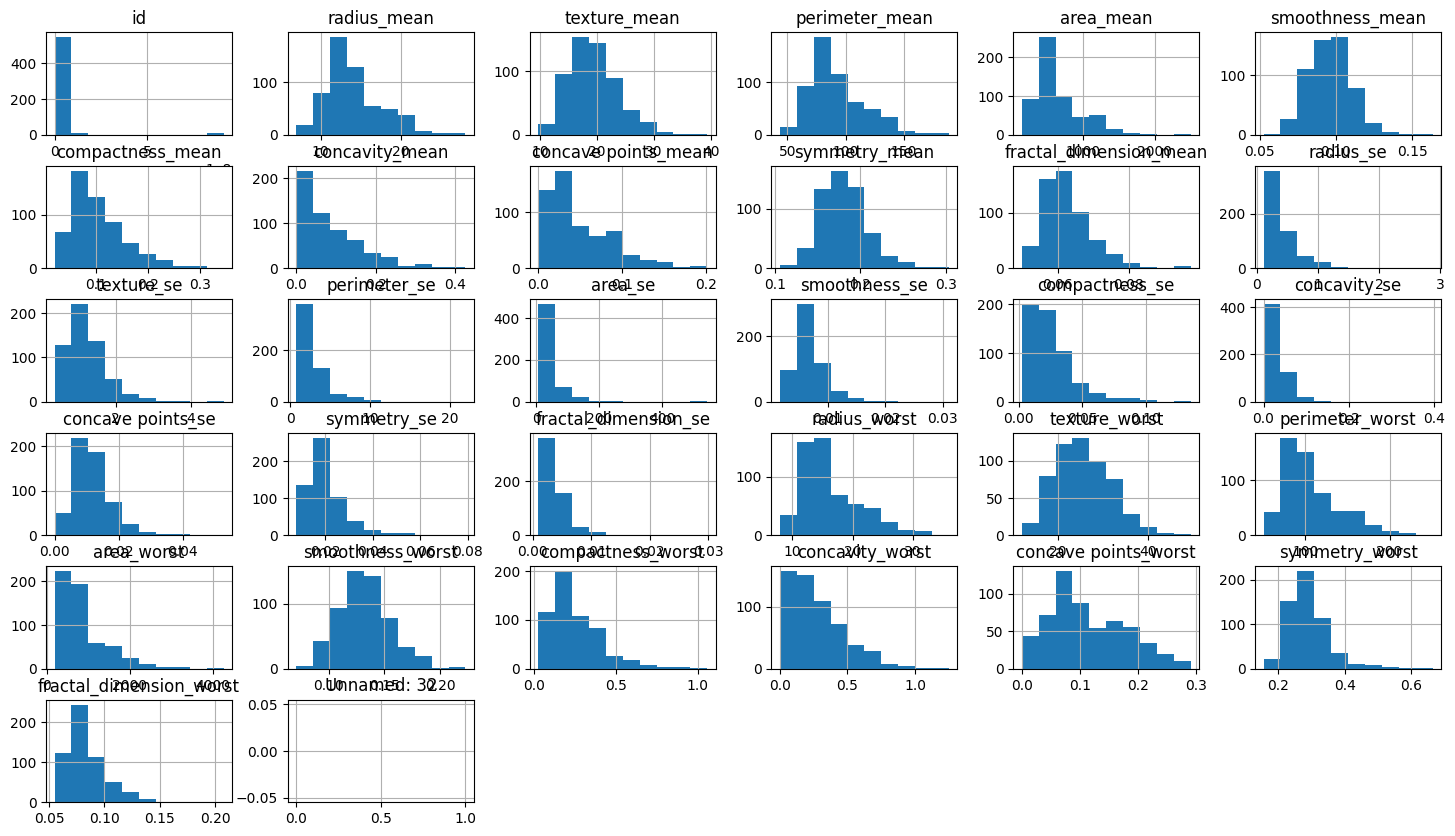

In [8]:
data.hist(figsize=(18, 10));

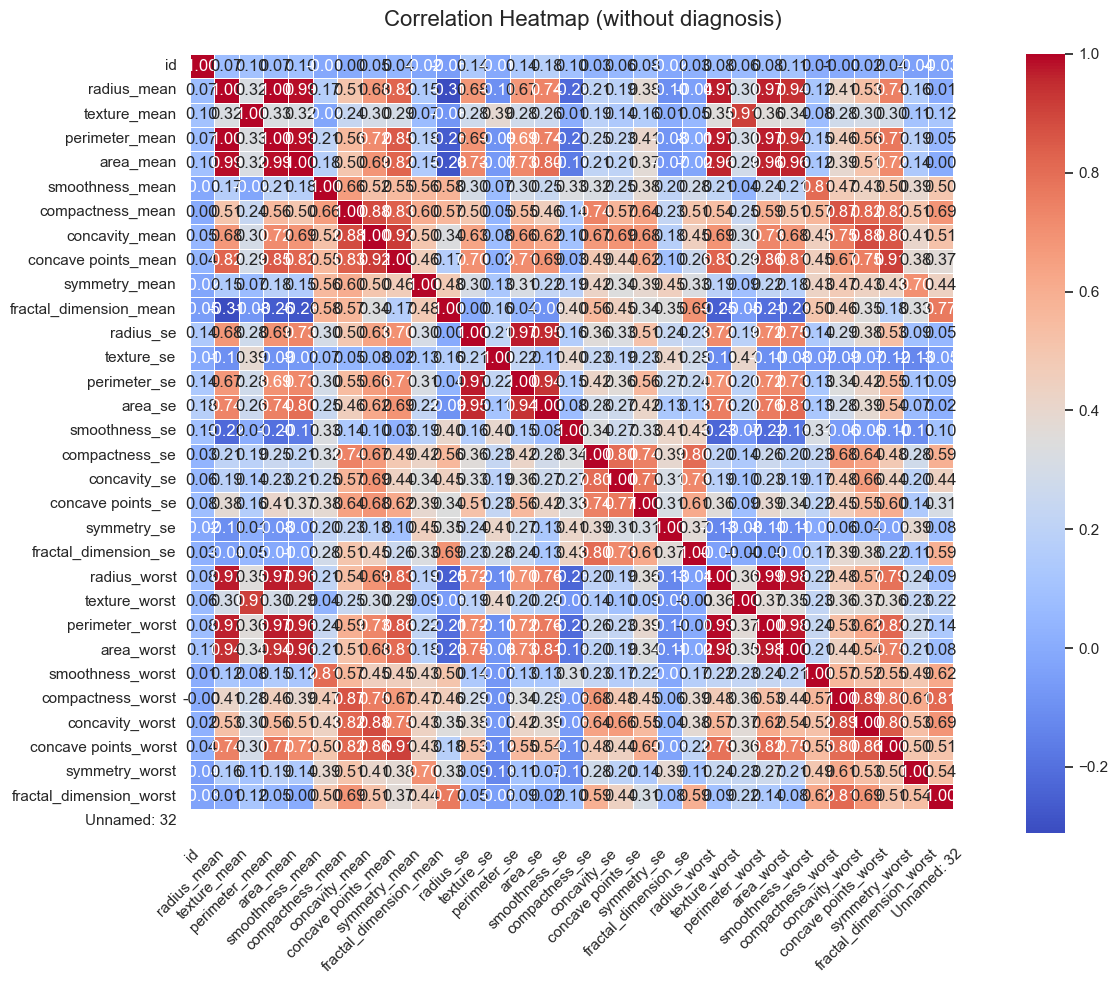

In [9]:
#correlation map
corr_matrix = data.drop(columns=['diagnosis']).corr()

# ------------------------------------------------------------------
# 2. Построим heatmap
plt.figure(figsize=(12, 10))          # размер фигуры
sns.set(style="white")                # стиль

heat = sns.heatmap(
    corr_matrix,
    annot=True,            # показывать коэффициенты корреляции в ячейках
    fmt='.2f',             # формат: две цифры после запятой
    cmap='coolwarm',       # цветовая палитра (можно изменить)
    linewidths=.5,         # ширина линий сетки
    cbar=True              # добавить полосу цвета
)

heat.set_title('Correlation Heatmap (without diagnosis)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# val = 0.8 

# high_corr = [(col, row, val) for col in upper.columns 
#              for row in upper.index 
#              if (abs(upper.loc[row, col]) > 0.8)]
high_corr = [(col, row) for col in upper.columns
             for row in upper.index
             if abs(upper.loc[row, col]) > 0.8]


print(
    f"Найдено {len(high_corr)} пар ↔ :\n"
    + "\n".join(f"{x}" for x in high_corr)
)

Найдено 44 пар ↔ :
('perimeter_mean', 'radius_mean')
('area_mean', 'radius_mean')
('area_mean', 'perimeter_mean')
('concavity_mean', 'compactness_mean')
('concave points_mean', 'radius_mean')
('concave points_mean', 'perimeter_mean')
('concave points_mean', 'area_mean')
('concave points_mean', 'compactness_mean')
('concave points_mean', 'concavity_mean')
('perimeter_se', 'radius_se')
('area_se', 'area_mean')
('area_se', 'radius_se')
('area_se', 'perimeter_se')
('concavity_se', 'compactness_se')
('fractal_dimension_se', 'compactness_se')
('radius_worst', 'radius_mean')
('radius_worst', 'perimeter_mean')
('radius_worst', 'area_mean')
('radius_worst', 'concave points_mean')
('texture_worst', 'texture_mean')
('perimeter_worst', 'radius_mean')
('perimeter_worst', 'perimeter_mean')
('perimeter_worst', 'area_mean')
('perimeter_worst', 'concave points_mean')
('perimeter_worst', 'radius_worst')
('area_worst', 'radius_mean')
('area_worst', 'perimeter_mean')
('area_worst', 'area_mean')
('area_wor

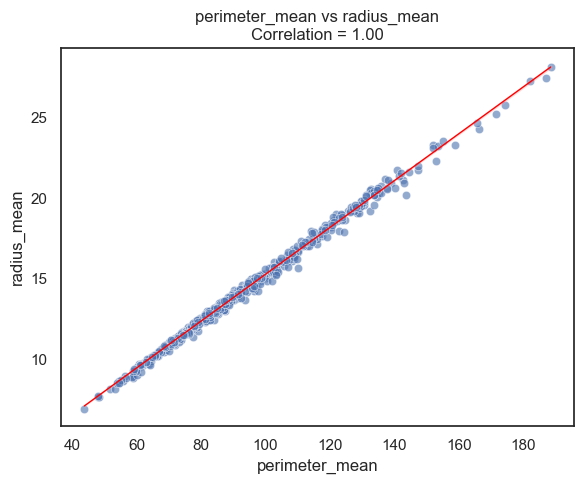

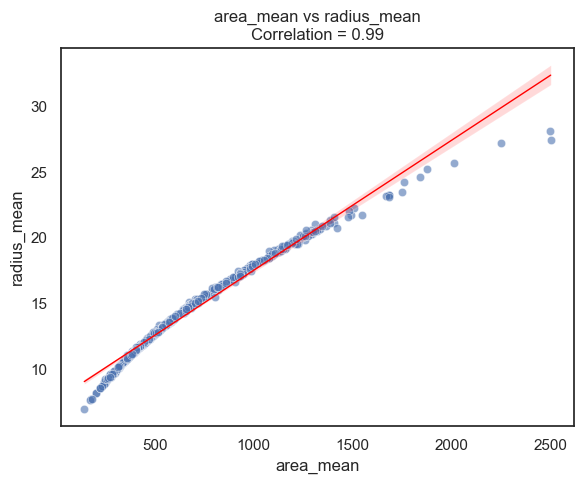

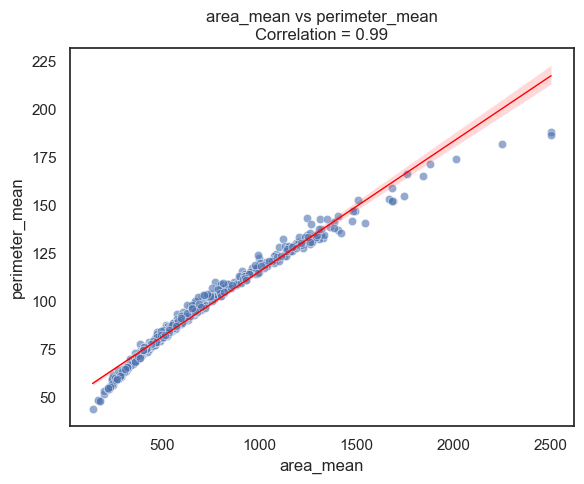

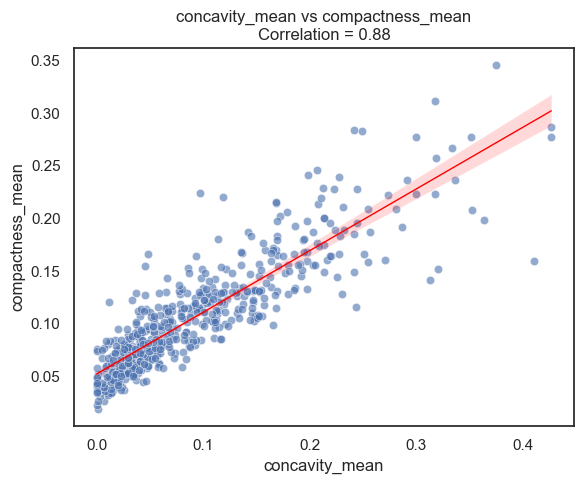

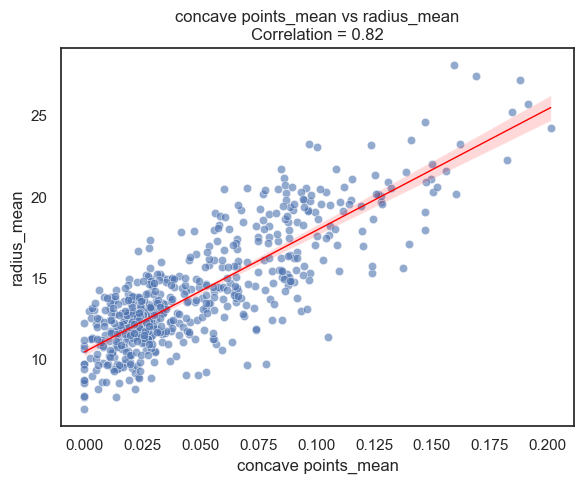

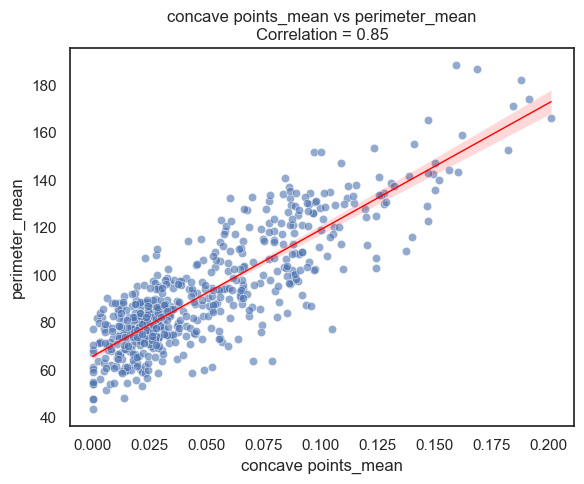

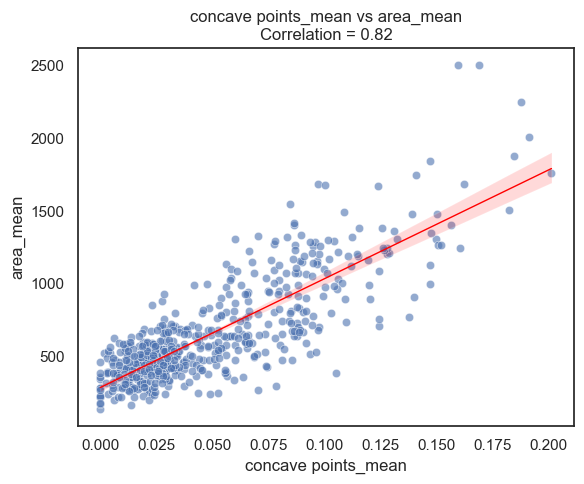

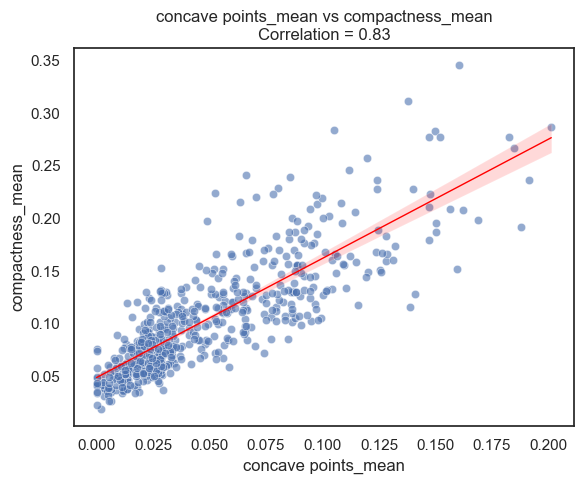

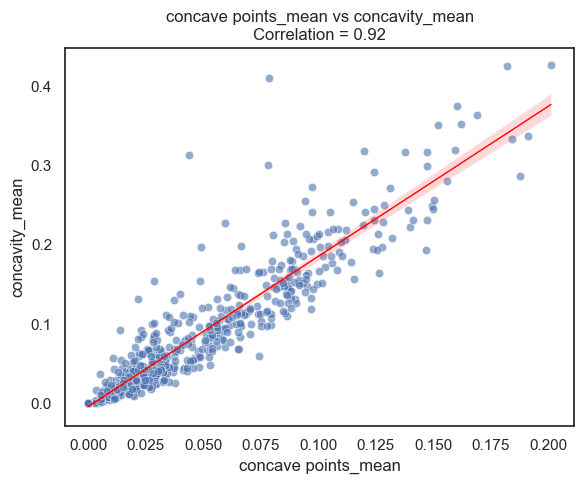

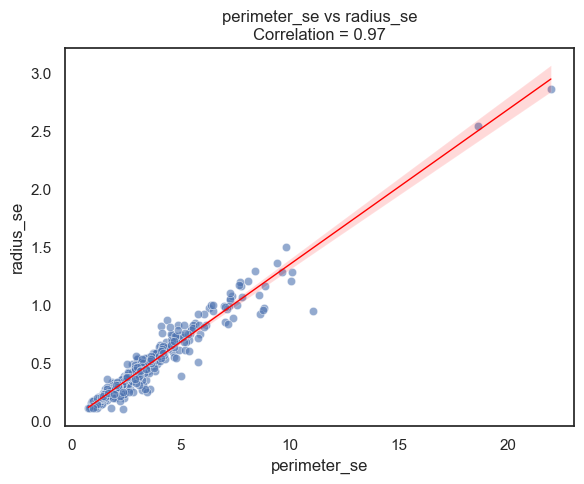

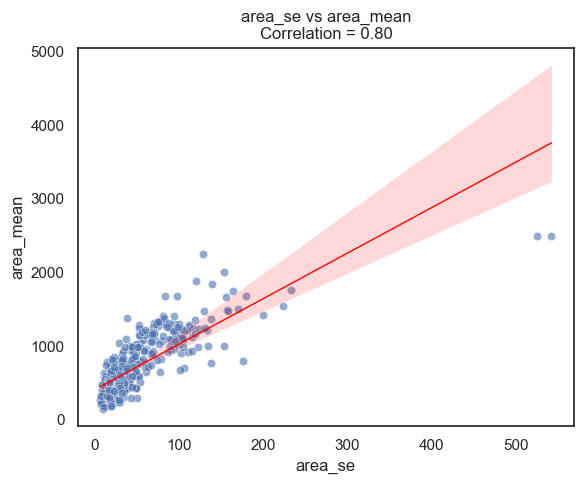

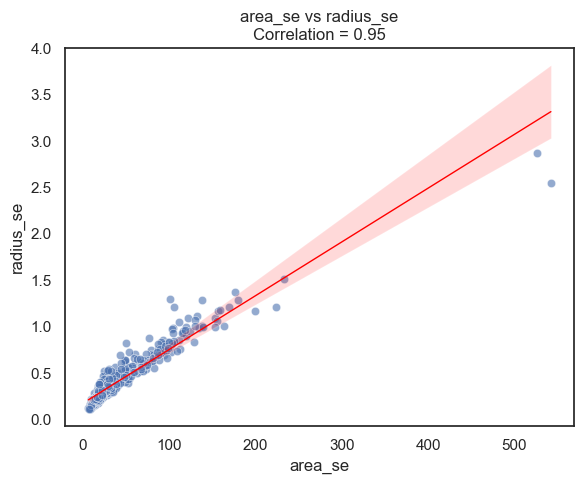

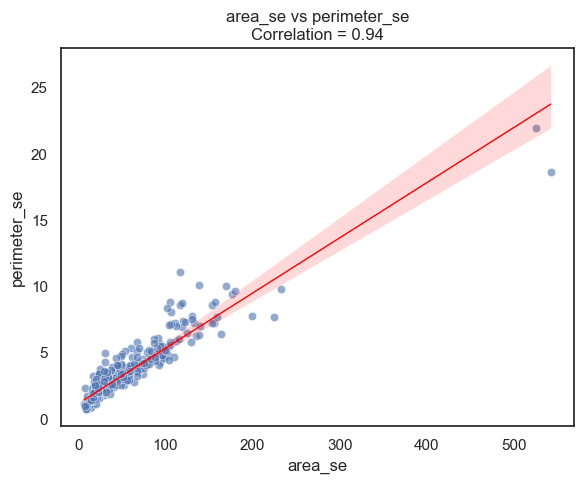

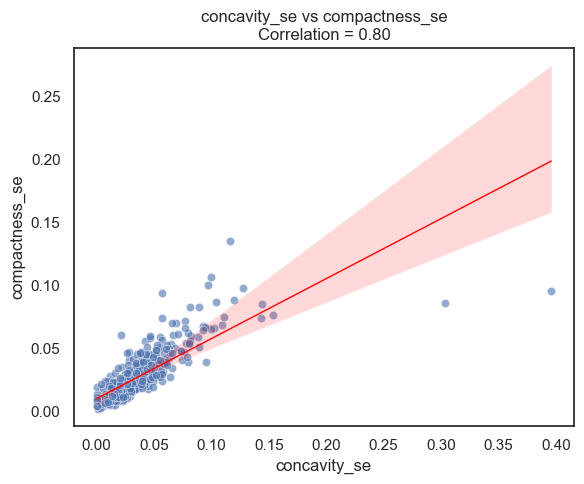

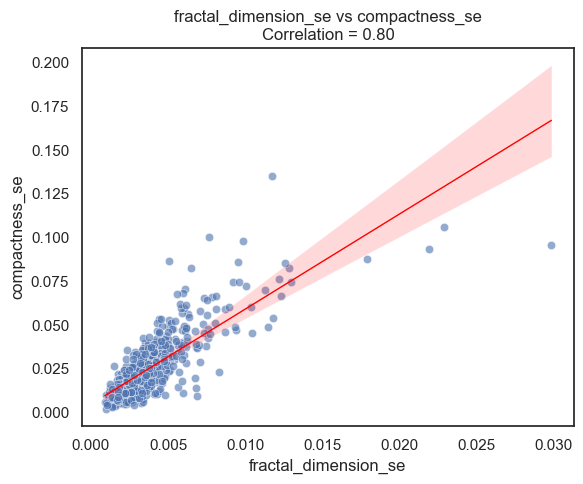

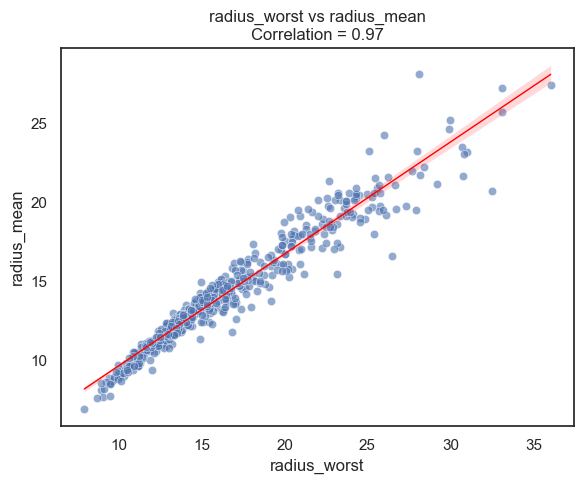

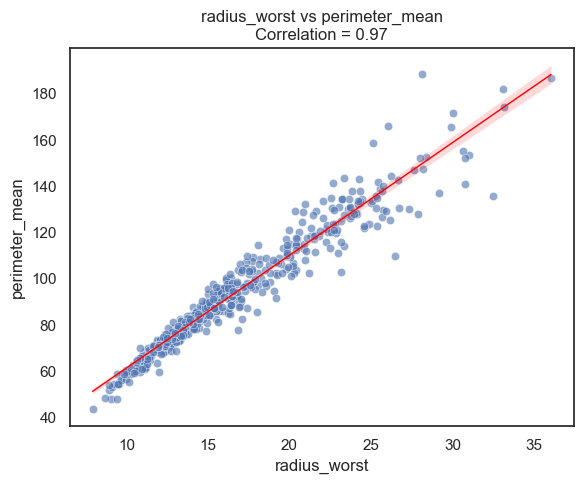

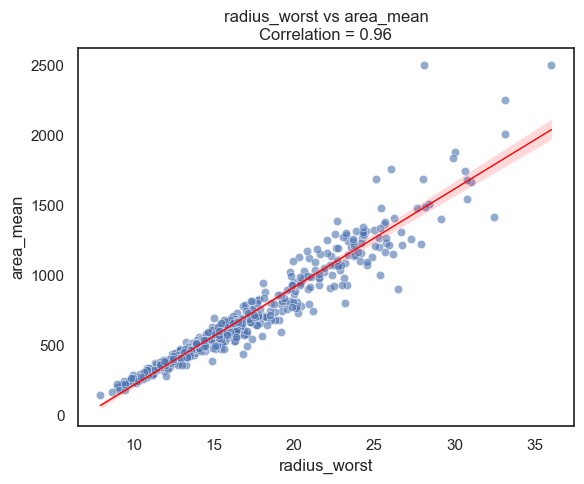

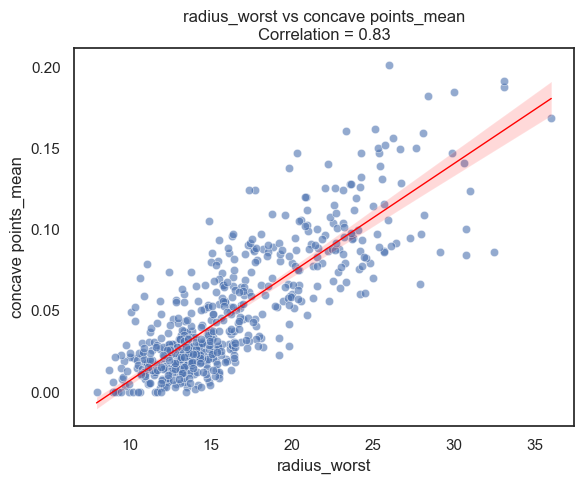

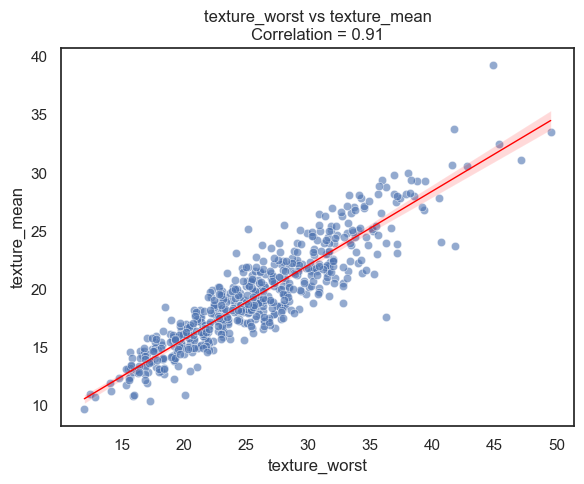

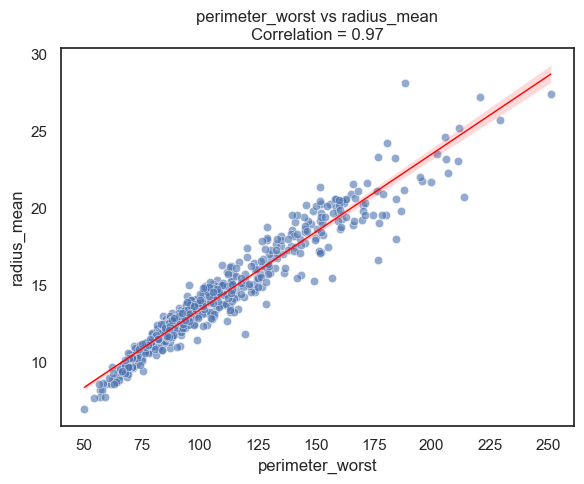

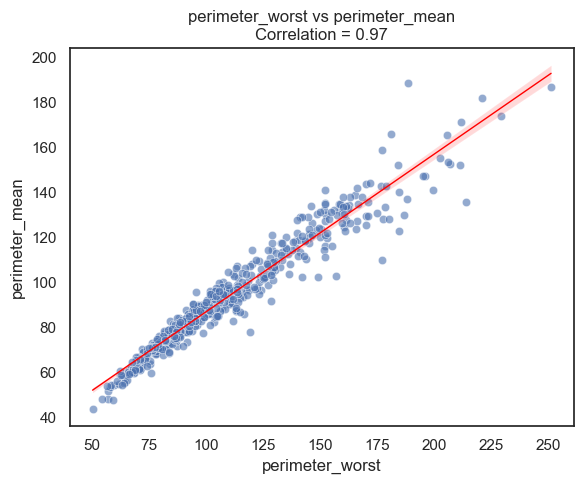

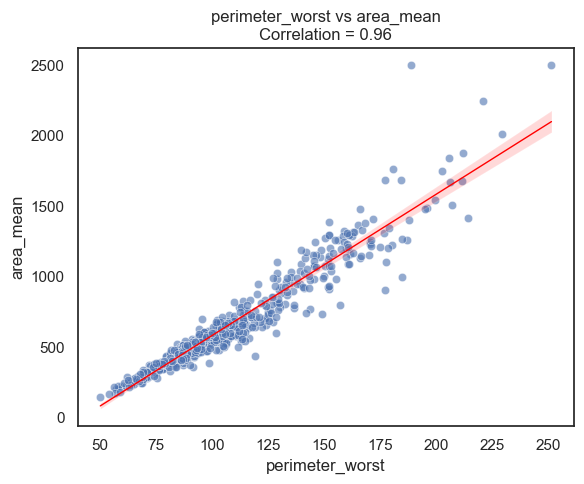

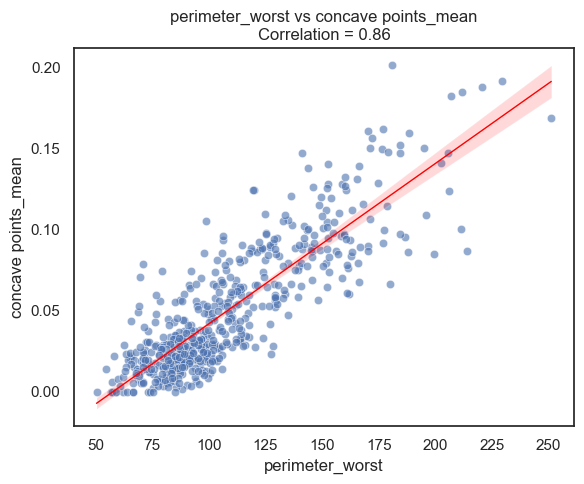

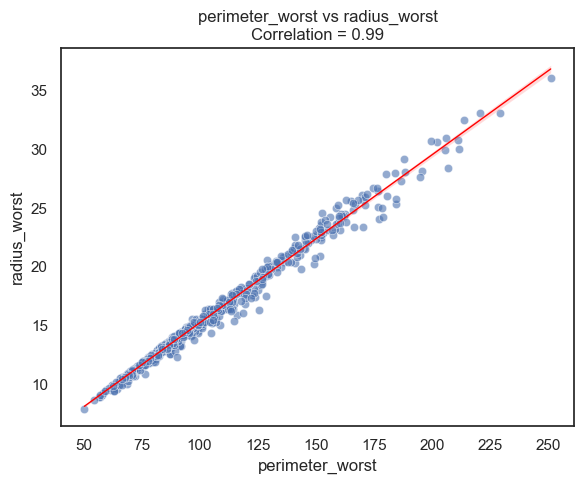

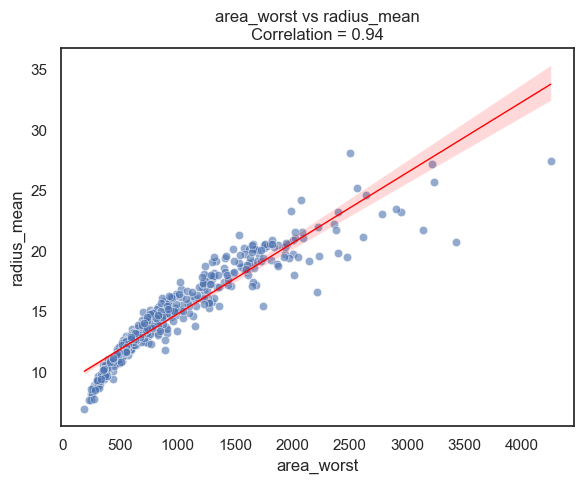

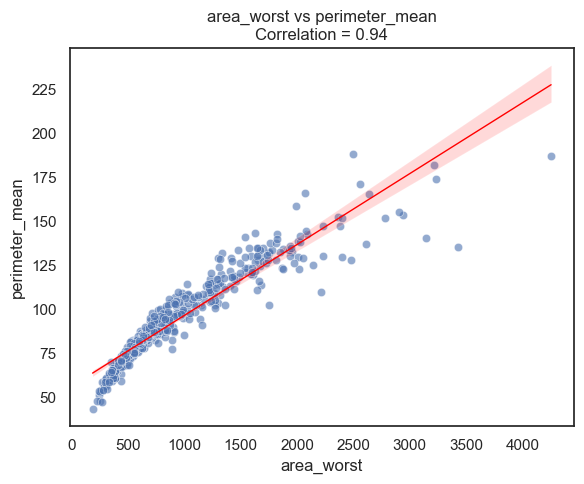

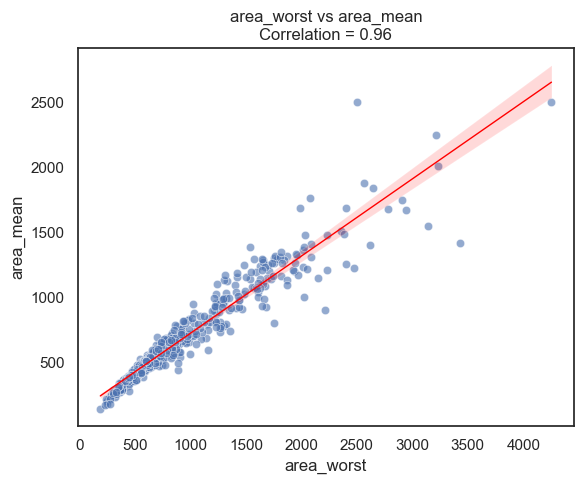

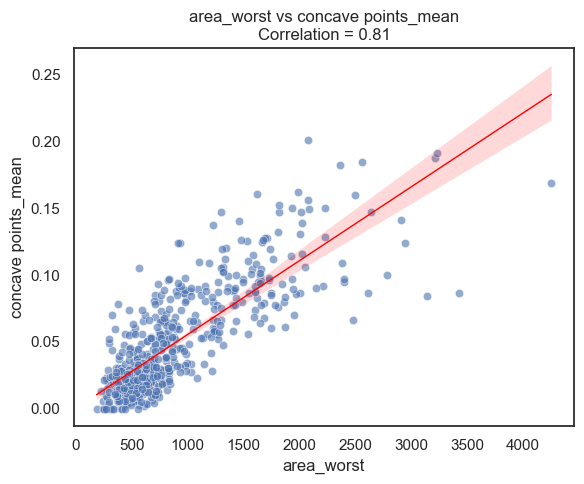

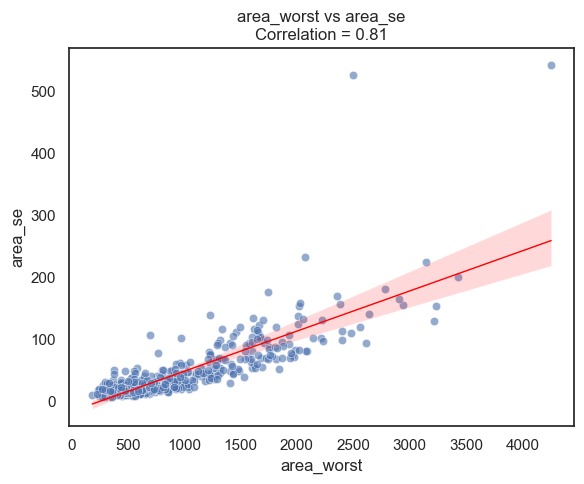

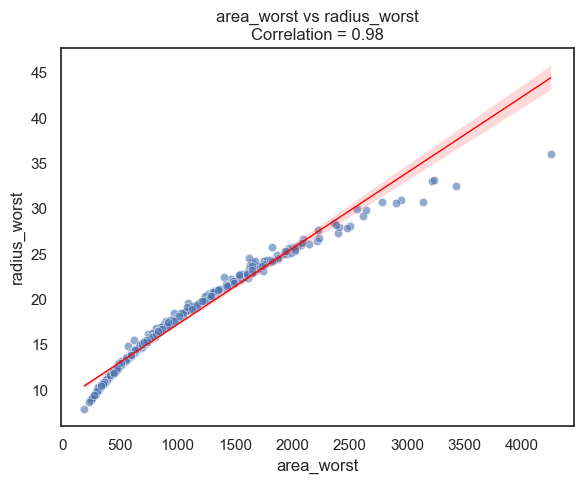

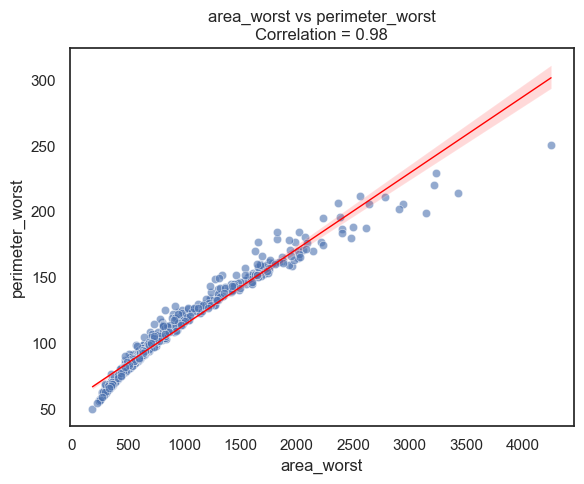

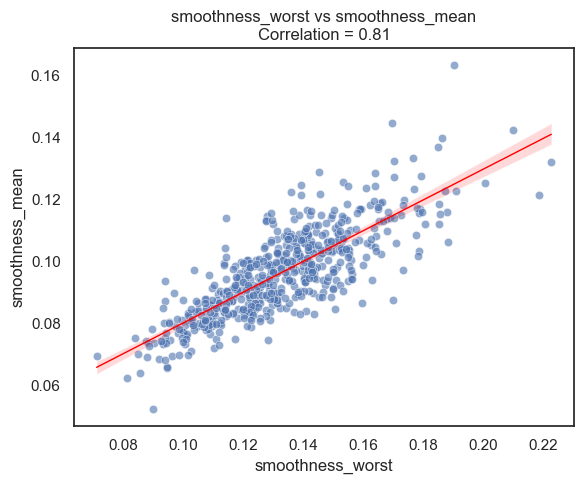

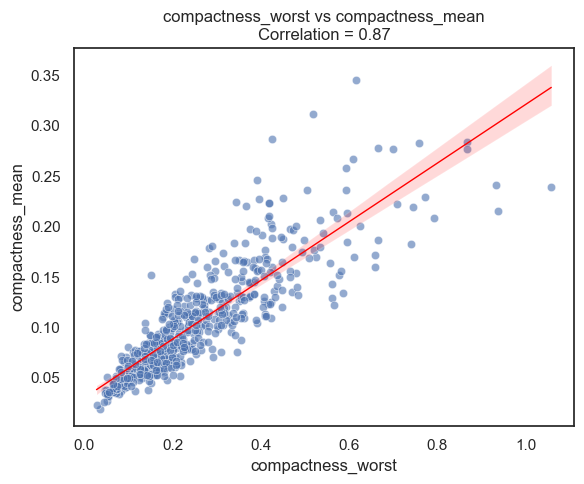

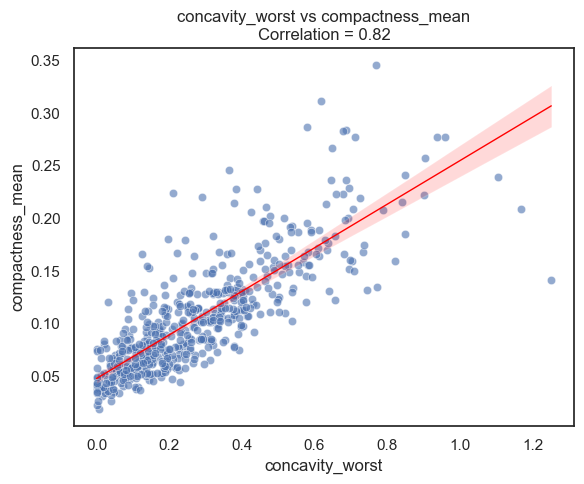

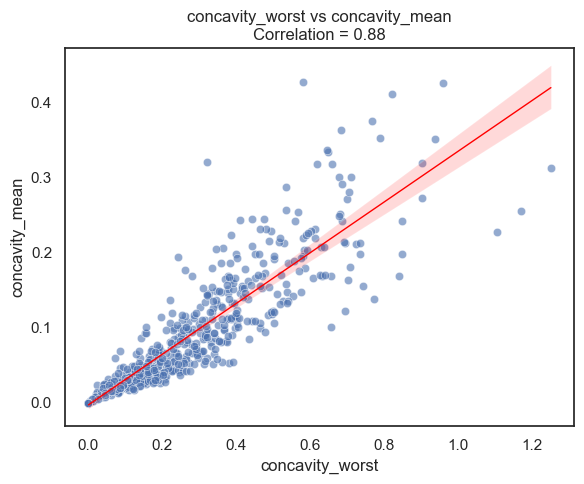

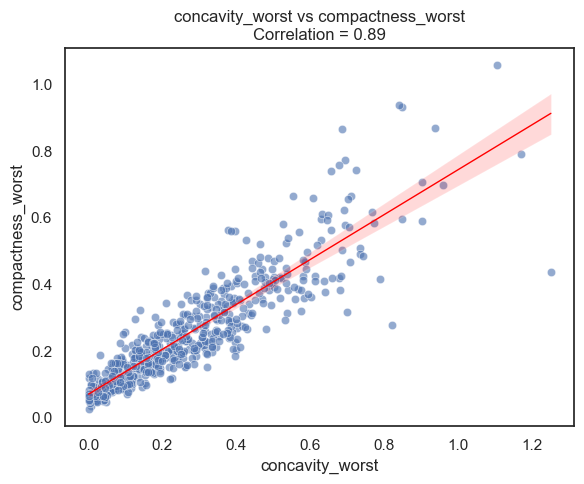

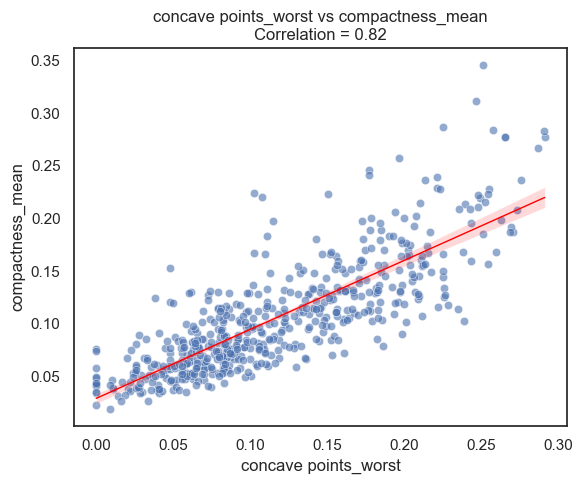

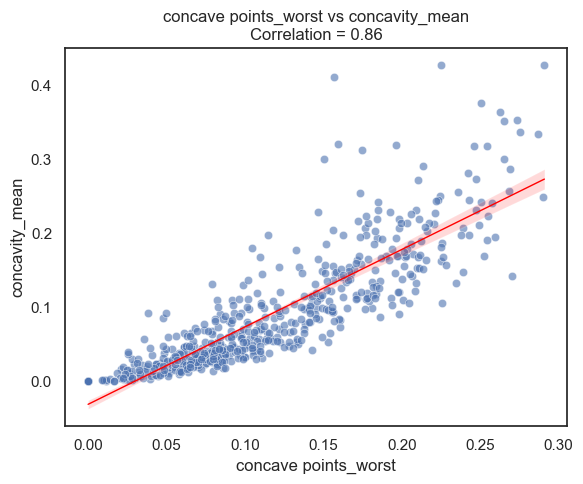

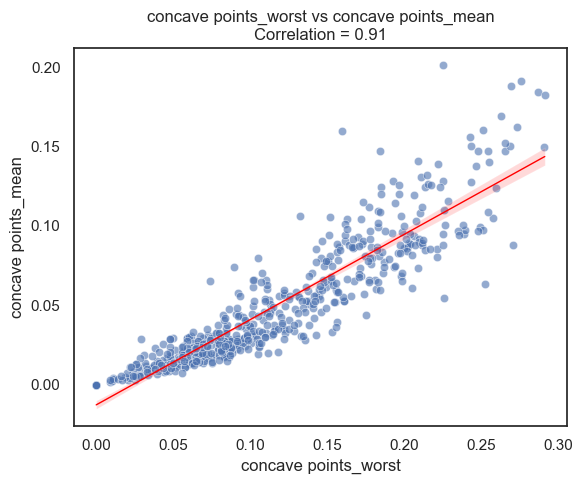

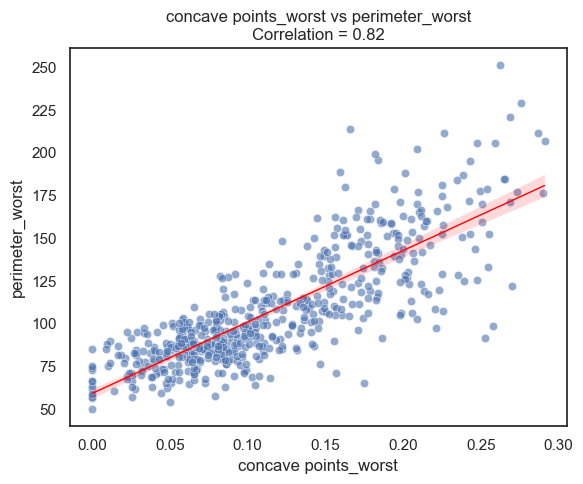

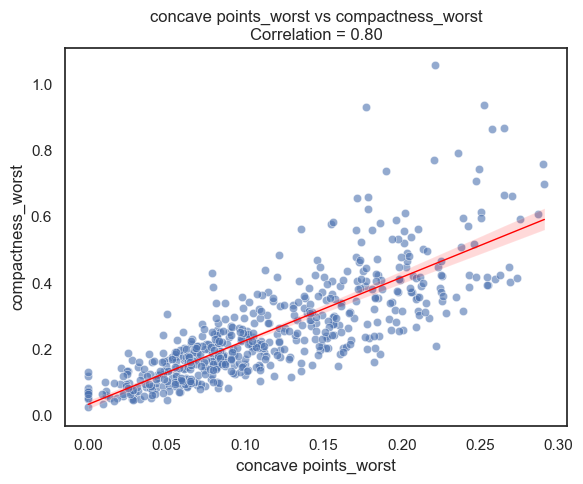

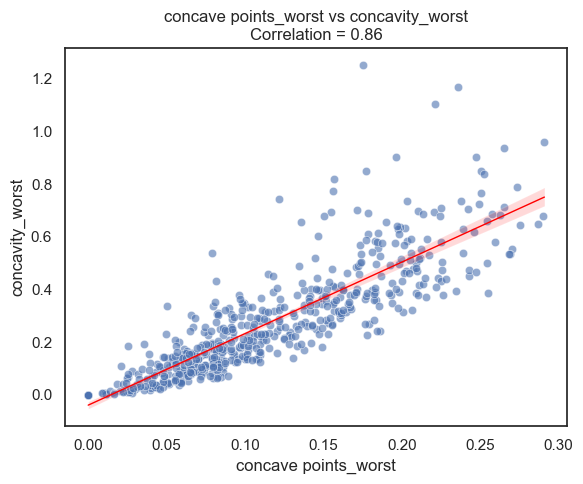

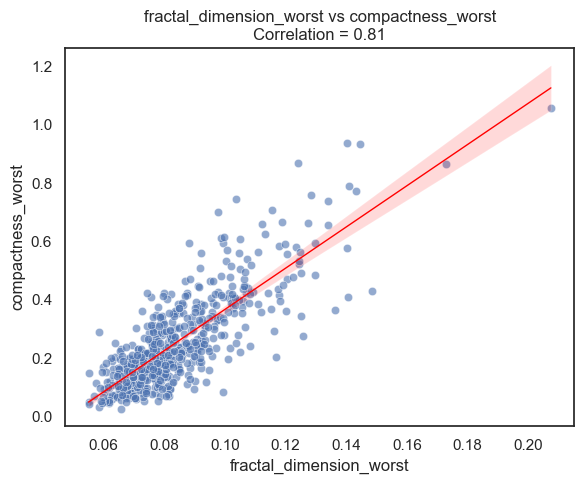

In [11]:
for x_col, y_col in high_corr:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.6)

    # Добавляем линию регрессии (опционально)
    sns.regplot(
        data=data,
        x=x_col,
        y=y_col,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1}
    )

    plt.title(f'{x_col} vs {y_col}\nCorrelation = {corr_matrix.loc[y_col, x_col]:.2f}')
    plt.tight_layout()
    plt.show()

cannot access local variable 'boxprops' where it is not associated with a value


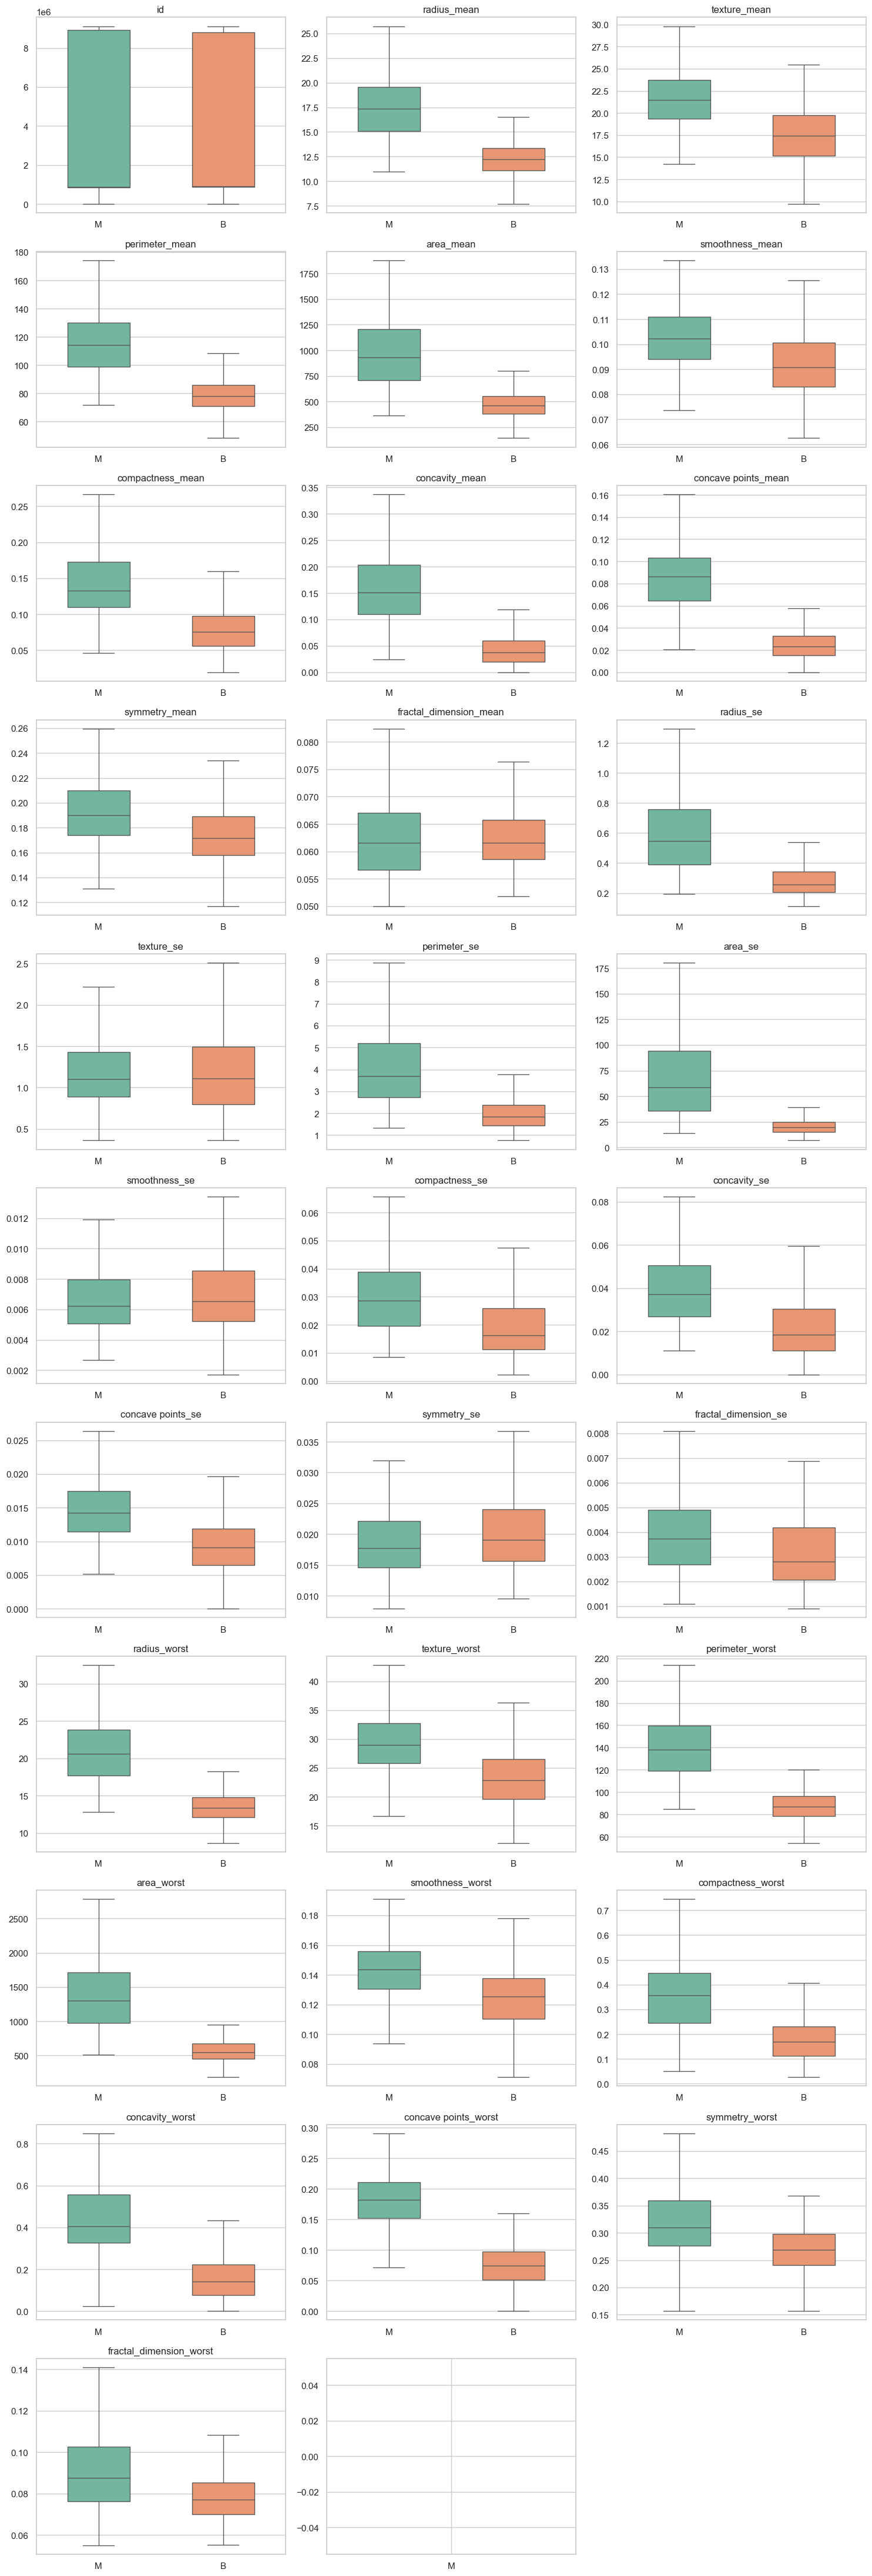

In [12]:
target_col = 'diagnosis'              # колонка с диагнозом (M/B)
features   = [c for c in data.columns if c != target_col]  # все признаки

# --------------- Построение графиков -----------------
sns.set_style("whitegrid")
n = len(features)

cols_per_row = 3
rows = (n + cols_per_row - 1) // cols_per_row   # число рядов

fig, axes = plt.subplots(rows, cols_per_row,
                         figsize=(5 * cols_per_row, 4 * rows),
                         squeeze=False)

try:
    for i, feat in enumerate(features):
        ax = axes[i // cols_per_row][i % cols_per_row]
        sns.boxplot(x=target_col, y=feat, data=data,
                    palette="Set2", showfliers=False,
                    width=0.5,  # ширина коробок
                    linewidth=1,  # толщина линий
                    ax=ax)
        ax.set_title(feat)
        ax.set_xlabel('')
        ax.set_ylabel('')
except Exception as e:
    print(e)


# Удаляем лишние пустые подграфики (если их стало меньше нужного количества)
for j in range(i + 1, rows * cols_per_row):
    fig.delaxes(axes[j // cols_per_row][j % cols_per_row])

plt.tight_layout()
plt.show()

**Часть 2. Моделирование при помощи kNN**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Предположим, что `data` уже загружен в DataFrame
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']
y = y.map({'M': 1, 'B': 0})

# 1. Разделяем без удаления NaN
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


In [14]:
y_train.value_counts(normalize=True)

diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64

In [15]:
y_test.value_counts(normalize=True)

diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64

In [16]:
# Кратко поясните, почему стандартизация здесь нужна. - 
# мы не хотим, чтобы информация из отложенной выборки просачивалась в тренировочную (data leak).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # заполняем NaN медианой - без этого будет ошибка
    ('scaler', StandardScaler()),                    # масштабируем признаки
    ('knn', KNeighborsClassifier(n_neighbors=5))     # классификатор
])

In [18]:
# Обучаем
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [19]:
# Прогнозируем
y_pred = pipe.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))

Accuracy : 0.956140350877193
Precision: 0.9743589743589743
Recall   : 0.9047619047619048
F1-score : 0.9382716049382716


AUC: 0.983


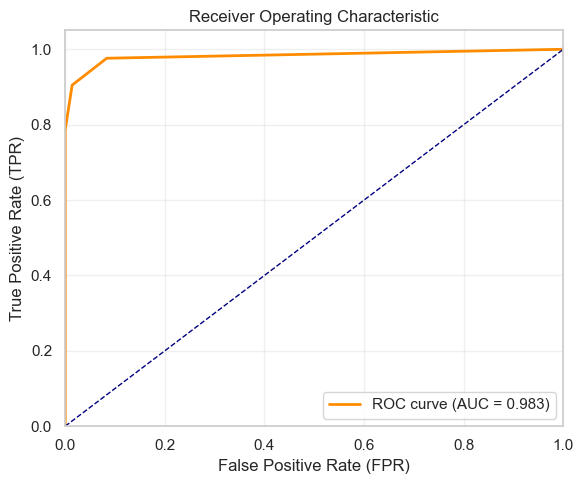

In [20]:
from sklearn.metrics import roc_curve, auc
y_prob = pipe.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f"AUC: {roc_auc:.3f}")
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
# GridSearchCV - изменение числа соседей на кросс-валидации
from sklearn.model_selection import GridSearchCV
param_grid = {'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Лучшее k:", grid.best_params_['knn__n_neighbors'])
print("AUC на CV:", grid.best_score_)

Лучшее k: 13
AUC на CV: 0.9897832817337461


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_prob = grid.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC на тесте (с GridSearch):", test_auc)

# 5. Сравнение с фиксированным k=5
base_auc = roc_auc_score(y_test, y_prob)
print("AUC на тесте (k=5):", base_auc)

AUC на тесте (с GridSearch): 0.994047619047619
AUC на тесте (k=5): 0.9828042328042328
